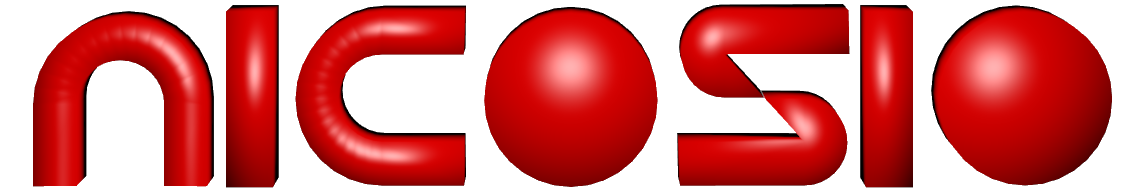
# Operaciones

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1=pd.DataFrame({'col1':[1,2,3,4],
                  'col2':[444,555,666,444],
                  'col3':['abc','def','ghi','xyz']})
df1.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


Hagamos busqueda de valores unicos. Una forma de hacerlo es por medio del metodo unique, regresa un array de numpy con los valores unicos correspondientes. es decir cada valor aparece una vez sin importar cuantas repeticiones tenga

In [3]:
unicos=df1['col2'].unique()
cantidad=df1['col2'].nunique()
print(unicos)
print(cantidad)

[444 555 666]
3


Para saber cuantas veces aparece cada valor usamos value_counts

In [4]:
conteo=df1['col2'].value_counts()
print(conteo)

444    2
555    1
666    1
Name: col2, dtype: int64


 Ahora veamos como podemos aplicar una funcion propia a un dataframe.<BR>
 El metodo apply nos permite pasar una columna a una funcion

In [5]:
def impuesto(n):
    return n*1.16

impuestos=df1['col1'].apply(impuesto)
print(impuestos)

0    1.16
1    2.32
2    3.48
3    4.64
Name: col1, dtype: float64


Tambien se puede usar con expresiones lambda

In [7]:
impuestos2=df1['col2'].apply(lambda n:n*1.16)
print(impuestos2)

# Adicionamos la columna impuesto con los valores calculados
df1['impuesto']=df1['col2'].apply(lambda n:n*1.16)
print(df1)

# Sobreescribimos col1 con los valores calculados
df1['col1']=df1['col1'].apply(lambda n:n*19.8)
print(df1)

0    515.04
1    643.80
2    772.56
3    515.04
Name: col2, dtype: float64
   col1  col2 col3  impuesto
0  19.8   444  abc    515.04
1  39.6   555  def    643.80
2  59.4   666  ghi    772.56
3  79.2   444  xyz    515.04
      col1  col2 col3  impuesto
0   392.04   444  abc    515.04
1   784.08   555  def    643.80
2  1176.12   666  ghi    772.56
3  1568.16   444  xyz    515.04


Podemos llevar a cabo el ordenamiento por valores de la columna

In [8]:
print(df1)
ordenado=df1.sort_values(by='col2')
print(ordenado)

      col1  col2 col3  impuesto
0   392.04   444  abc    515.04
1   784.08   555  def    643.80
2  1176.12   666  ghi    772.56
3  1568.16   444  xyz    515.04
      col1  col2 col3  impuesto
0   392.04   444  abc    515.04
3  1568.16   444  xyz    515.04
1   784.08   555  def    643.80
2  1176.12   666  ghi    772.56


Si deseamos podemos saber si hay null nan en nuestro df

In [ ]:
df1.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


In [10]:
df2=pd.DataFrame({'col1':[1,2,3,np.nan],
                  'col2':[10,np.nan,666,444],
                  'col3':[np.nan,'def','ghi','xyz']})
print(df2)

print(df2.isnull())

   col1   col2 col3
0   1.0   10.0  NaN
1   2.0    NaN  def
2   3.0  666.0  ghi
3   NaN  444.0  xyz
    col1   col2   col3
0  False  False   True
1  False   True  False
2  False  False  False
3   True  False  False


Vamos a hacer un pivote del dataframe<BR>
Cambiamos de formato de columnas a formato de filas<BR>





In [11]:
#Empezamos creando un MultiIndex
datos = {'Animal':['gato','gato','gato','perro','perro','perro'],
     'Comida':['Croquetas','Croquetas','Pollo','Pollo','Croquetas','Croquetas'],
       'Sexo':['m','h','m','h','m','h'],
       'Edad':[1,3,2,5,4,1]}

df2 = pd.DataFrame(datos)
print(df2)

  Animal     Comida Sexo  Edad
0   gato  Croquetas    m     1
1   gato  Croquetas    h     3
2   gato      Pollo    m     2
3  perro      Pollo    h     5
4  perro  Croquetas    m     4
5  perro  Croquetas    h     1


Usamos pivot_table<BR>
Tenemos que pasar los valores<BR>
Luego pasamos el indice, al pasar dos, se crea un MultiIndex<BR>
Despues indicamos la columna de la cual nos interesan los valores

In [12]:
pivoteado=df2.pivot_table(values='Edad',index=['Animal','Comida'], columns=['Sexo'])
print(pivoteado)

Sexo                h    m
Animal Comida             
gato   Croquetas  3.0  1.0
       Pollo      NaN  2.0
perro  Croquetas  1.0  4.0
       Pollo      5.0  NaN
